# 1. Setup Mario

In [2]:
!pip install gym_super_mario_bros==7.3.0 nes_py

In [1]:
# Import the game
import gym_super_mario_bros
import gym
# import the joypad wapper
from nes_py.wrappers import JoypadSpace
# import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [4]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [2]:
# Setup the game
env = gym_super_mario_bros.make('SuperMarioBros-v0',apply_api_compatibility=True, render_mode='human')

c:\Users\aky\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
c:\Users\aky\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


In [6]:
env.action_space 

Discrete(256)

256 different pattern combination, by wrapping it up with joypad space, we can simplify it down

In [3]:
# Wrap the game with the joypad wrapper
env = JoypadSpace(env, SIMPLE_MOVEMENT) # parameters: env- the game, SIMPLE_MOVEMENT- the controls

In [8]:
env.action_space 

Discrete(7)

In [9]:
#env.observation_space
print("Frame size: ", env.observation_space.shape)
print("Action size: ", env.action_space.n)

Frame size:  (240, 256, 3)
Action size:  7


In [10]:
# Getting random action
SIMPLE_MOVEMENT[env.action_space.sample()]

['right', 'A', 'B']

In [ ]:
# Create a flag - restart or not
done = True
env.reset()
# Loop through each frame in the game
for step in range (100000):
    # Start the game to begin with

    # Do random actions
    state, reward, terminated, truncated, info = env.step(env.action_space.sample())
    #action = env.action_space.sample()
    #state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # Show the game on the screen
    env.render()
    if done:
        # Start the game
        env.reset()

# Close the game
env.close()

In [7]:
env.close()

In [ ]:
state = env.reset()
state.shape

In [ ]:
env.step(1)[3]

# 2. Preprocess the Environment

In [6]:
# Install PyTorch
!pip3 install torch torchvision torchaudio

     ---------------------------------------- 2.1/2.1 MB 12.3 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 525.3 kB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 598.7 kB/s eta 0:00:00
     ------------------------------------- 969.5/969.5 kB 10.2 MB/s eta 0:00:00


In [ ]:
# Reinformcement Learning Library
!pip install stable-baselines3[extra]

In [7]:
# Import Frame Stacker Wrapper nd GrayScaling Wrapper
from gym.wrappers import FrameStack, GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, VecTransposeImage, VecNormalize, VecVideoRecorder, DummyVecEnv
# Import Matplotlib
from matplotlib import pyplot as plt

In [11]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
#env = GrayScaleObservation(env, keep_dim=False)
# 4. Wrap inside the Dummy Environment

# 5. Stack the Frames

c:\Users\aky\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(


In [12]:
# Test out the grayscaled
state = env.reset()
state.shape

c:\Users\aky\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`


(240, 256, 3)

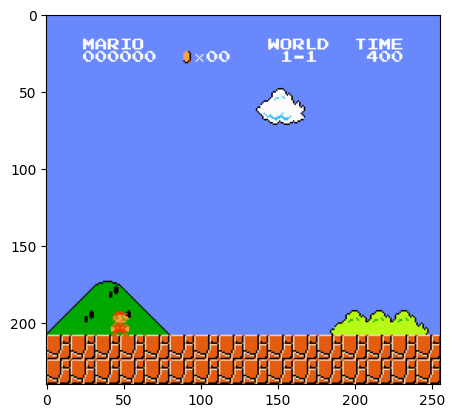

In [13]:
# Using matplotlib to show the game frame
plt.imshow(state)

# 3. Train the RL Model

# 4. Test it Out